# Basic Model Training

### Setting up

**Notebook setup**. Select the "Edit" menu, then "Notebook settings". Choose "GPU" as the hardware accelerator. Check that "Omit code cell output..." is unchecked (so that the output is saved).



### Pytorch, dataset

In [2]:
from torchvision import datasets
from torchvision.transforms import ToTensor

In [3]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 10.9MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 169kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.07MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 10.4MB/s]


### Explore the data

In [4]:
print(training_data.data.size())
print(training_data.targets.size())
print(test_data.data.size())
print(test_data.targets.size())

torch.Size([60000, 28, 28])
torch.Size([60000])
torch.Size([10000, 28, 28])
torch.Size([10000])


Data of one image

In [5]:
first_image, first_label = training_data[0]
first_image = first_image.numpy().squeeze()
print(f"Shape of first image: {first_image.shape}")
print(first_image)

Shape of first image: (28, 28)
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.

And this is what the image looks like (a shoe?)

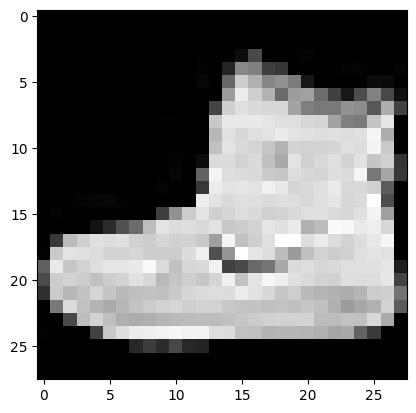

In [6]:
import matplotlib.pyplot as plt
plt.imshow(first_image, cmap='gray')

The label of the image (see the list of labels at https://github.com/zalandoresearch/fashion-mnist)

In [7]:
print(f"Label of first image: {first_label}")

Label of first image: 9


Put you code to create, train and test the model below

In [8]:
import torch

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [9]:
from torch import nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.cnn_stack = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(64 * 7 * 7, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )
    def forward(self, x):
        return self.cnn_stack(x)

model = CNN().to(device)

In [10]:
from torch.utils.data import DataLoader

batch_size = 64

train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [11]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  {current:>5d}/{size:>5d}")

In [12]:
epochs = 15
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
print("Done!")

Epoch 1
-------------------------------
loss: 2.301435     64/60000
loss: 0.701172   6464/60000
loss: 0.367494  12864/60000
loss: 0.563256  19264/60000
loss: 0.512048  25664/60000
loss: 0.466373  32064/60000
loss: 0.380199  38464/60000
loss: 0.548093  44864/60000
loss: 0.509356  51264/60000
loss: 0.425212  57664/60000
Epoch 2
-------------------------------
loss: 0.287670     64/60000
loss: 0.343245   6464/60000
loss: 0.210512  12864/60000
loss: 0.405658  19264/60000
loss: 0.393269  25664/60000
loss: 0.377794  32064/60000
loss: 0.295743  38464/60000
loss: 0.429720  44864/60000
loss: 0.394888  51264/60000
loss: 0.323584  57664/60000
Epoch 3
-------------------------------
loss: 0.238973     64/60000
loss: 0.269204   6464/60000
loss: 0.175970  12864/60000
loss: 0.304099  19264/60000
loss: 0.312860  25664/60000
loss: 0.369090  32064/60000
loss: 0.259960  38464/60000
loss: 0.371326  44864/60000
loss: 0.322334  51264/60000
loss: 0.278086  57664/60000
Epoch 4
-------------------------------


In [13]:
model.eval()

all_outputs = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model(inputs.to(device))
        all_outputs.append(outputs)
        all_labels.append(labels)

all_outputs = torch.cat(all_outputs, dim=0)
all_labels = torch.cat(all_labels, dim=0)

In [14]:
print(all_outputs[0])
print(torch.sum(all_outputs[0]))

tensor([-22.2931,  -5.1134, -22.8871, -13.0950, -12.6773, -12.4961,  -5.8991,
          3.8274, -14.5158,  16.3066], device='cuda:0')
tensor(-88.8429, device='cuda:0')


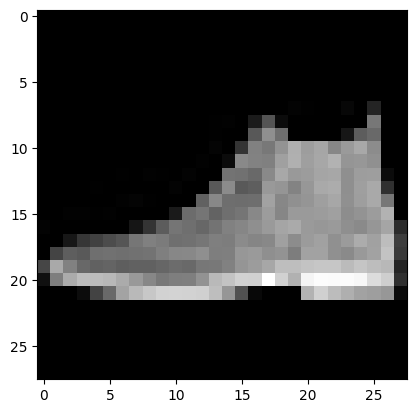

In [15]:
first_image, _ = test_data[0]
first_image = first_image.numpy().squeeze()
plt.imshow(first_image, cmap='gray')

In [16]:
print(torch.argmax(all_outputs[0]))
print(all_labels[0])

tensor(9, device='cuda:0')
tensor(9)


In [17]:
all_preds = torch.argmax(all_outputs, dim=1)
correct = torch.sum(all_preds.cpu() == all_labels)
print("Correct classes: {} of {} (accuracy: {})".format(correct, 10000, correct/10000))

Correct classes: 9090 of 10000 (accuracy: 0.9089999794960022)
